In [1]:
import pandas as pd 
import numpy as np 
import xgboost as xgb
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Telco_customer_churn.csv')
df.head

<bound method NDFrame.head of       CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   La

In [3]:
df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],axis=1,inplace=True)
df.head

<bound method NDFrame.head of       CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   La

In [4]:
print(df['Count'].unique())
print(df['Country'].unique())
print(df['State'].unique())
print(df['City'].unique())

[1]
['United States']
['California']
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']


In [5]:
df.drop(['CustomerID','Count','Country','State','Lat Long'],axis=1,inplace=True)

In [6]:
df['City'].replace(' ','_',regex=True,inplace=True)
df.head

C:\Users\Ranjit\AppData\Local\Temp\ipykernel_15728\2176345180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace(' ','_',regex=True,inplace=True)


<bound method NDFrame.head of               City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0      Los_Angeles     90003  33.964131 -118.272783    Male             No   
1      Los_Angeles     90005  34.059281 -118.307420  Female             No   
2      Los_Angeles     90006  34.048013 -118.293953  Female             No   
3      Los_Angeles     90010  34.062125 -118.315709  Female             No   
4      Los_Angeles     90015  34.039224 -118.266293    Male             No   
...            ...       ...        ...         ...     ...            ...   
7038       Landers     92285  34.341737 -116.539416  Female             No   
7039      Adelanto     92301  34.667815 -117.536183    Male             No   
7040         Amboy     92304  34.559882 -115.637164  Female             No   
7041  Angelus_Oaks     92305  34.167800 -116.864330  Female             No   
7042  Apple_Valley     92308  34.424926 -117.184503    Male             No   

     Partner Dependents  Tenure M

In [7]:
df.columns = df.columns.str.replace(' ','_')
df.head


<bound method NDFrame.head of               City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0      Los_Angeles     90003  33.964131 -118.272783    Male             No   
1      Los_Angeles     90005  34.059281 -118.307420  Female             No   
2      Los_Angeles     90006  34.048013 -118.293953  Female             No   
3      Los_Angeles     90010  34.062125 -118.315709  Female             No   
4      Los_Angeles     90015  34.039224 -118.266293    Male             No   
...            ...       ...        ...         ...     ...            ...   
7038       Landers     92285  34.341737 -116.539416  Female             No   
7039      Adelanto     92301  34.667815 -117.536183    Male             No   
7040         Amboy     92304  34.559882 -115.637164  Female             No   
7041  Angelus_Oaks     92305  34.167800 -116.864330  Female             No   
7042  Apple_Valley     92308  34.424926 -117.184503    Male             No   

     Partner Dependents  Tenure_M

In [8]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [11]:
print(df['Phone_Service'].unique())
print(df['Total_Charges'].unique())

['Yes' 'No']
['108.15' '151.65' '820.5' ... '7362.9' '346.45' '6844.5']


In [12]:
print(len(df.loc[df['Total_Charges'] == ' ']))
df.loc[df['Total_Charges'] == ' ']

11


,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [13]:
df.loc[(df['Total_Charges'] == ' '),'Total_Charges'] = 0

In [14]:
df.loc[df['Tenure_Months'] == 0]
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

In [15]:
df.replace(' ','_',regex=True,inplace=True)
df.head


<bound method NDFrame.head of               City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0      Los_Angeles     90003  33.964131 -118.272783    Male             No   
1      Los_Angeles     90005  34.059281 -118.307420  Female             No   
2      Los_Angeles     90006  34.048013 -118.293953  Female             No   
3      Los_Angeles     90010  34.062125 -118.315709  Female             No   
4      Los_Angeles     90015  34.039224 -118.266293    Male             No   
...            ...       ...        ...         ...     ...            ...   
7038       Landers     92285  34.341737 -116.539416  Female             No   
7039      Adelanto     92301  34.667815 -117.536183    Male             No   
7040         Amboy     92304  34.559882 -115.637164  Female             No   
7041  Angelus_Oaks     92305  34.167800 -116.864330  Female             No   
7042  Apple_Valley     92308  34.424926 -117.184503    Male             No   

     Partner Dependents  Tenure_M

In [16]:
X = df.drop('Churn_Value',axis=1).copy()
y = df['Churn_Value'].copy()
print(X.head)
print(y.head)

<bound method NDFrame.head of               City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0      Los_Angeles     90003  33.964131 -118.272783    Male             No   
1      Los_Angeles     90005  34.059281 -118.307420  Female             No   
2      Los_Angeles     90006  34.048013 -118.293953  Female             No   
3      Los_Angeles     90010  34.062125 -118.315709  Female             No   
4      Los_Angeles     90015  34.039224 -118.266293    Male             No   
...            ...       ...        ...         ...     ...            ...   
7038       Landers     92285  34.341737 -116.539416  Female             No   
7039      Adelanto     92301  34.667815 -117.536183    Male             No   
7040         Amboy     92304  34.559882 -115.637164  Female             No   
7041  Angelus_Oaks     92305  34.167800 -116.864330  Female             No   
7042  Apple_Valley     92308  34.424926 -117.184503    Male             No   

     Partner Dependents  Tenure_M

In [17]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

In [18]:
pd.get_dummies(X , columns=['Payment_Method']).copy()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,False,False,False,True
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,False,False,True,False
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,False,False,True,False
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,False,False,True,False
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No_internet_service,No_internet_service,Two_year,Yes,21.15,1419.40,True,False,False,False
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,Yes,Yes,One_year,Yes,84.80,1990.50,False,False,False,True
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,Yes,Yes,One_year,Yes,103.20,7362.90,False,True,False,False
7041,Angelus_Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,Month-to-month,Yes,29.60,346.45,False,False,True,False


In [19]:
X_encoded = pd.get_dummies(X , columns=['City',
                                       'Gender',
                                       'Senior_Citizen',
                                       'Partner',
                                       'Dependents',
                                       'Phone_Service',
                                       'Multiple_Lines',
                                       'Internet_Service',
                                       'Online_Backup',
                                       'Online_Security',
                                       'Device_Protection',
                                       'Tech_Support',
                                       'Streaming_TV',
                                       'Streaming_Movies',
                                       'Contract',
                                       'Paperless_Billing',
                                       'Payment_Method'])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,90005,34.059281,-118.307420,2,70.70,151.65,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,90006,34.048013,-118.293953,8,99.65,820.50,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
3,90010,34.062125,-118.315709,28,104.80,3046.05,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,90015,34.039224,-118.266293,49,103.70,5036.30,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False


In [20]:
print(y.unique())

[1 0]


In [21]:
sum(y)/len(y)

0.2653698707936959

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded ,y , random_state=42, stratify=y)

In [23]:
sum(y)/len(y)


0.2653698707936959

In [24]:
sum(y)/len(y)

0.2653698707936959

In [25]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',eval_metric='aucpr',early_stopping_rounds=10,seed=42)
clf_xgb.fit(X_train,y_train,
           verbose=True,
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.63785
[1]	validation_0-aucpr:0.64982
[2]	validation_0-aucpr:0.65387
[3]	validation_0-aucpr:0.65349
[4]	validation_0-aucpr:0.65982
[5]	validation_0-aucpr:0.65564
[6]	validation_0-aucpr:0.65947
[7]	validation_0-aucpr:0.65758
[8]	validation_0-aucpr:0.65258
[9]	validation_0-aucpr:0.65392
[10]	validation_0-aucpr:0.65230
[11]	validation_0-aucpr:0.65334
[12]	validation_0-aucpr:0.65225
[13]	validation_0-aucpr:0.65724
[14]	validation_0-aucpr:0.65439


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

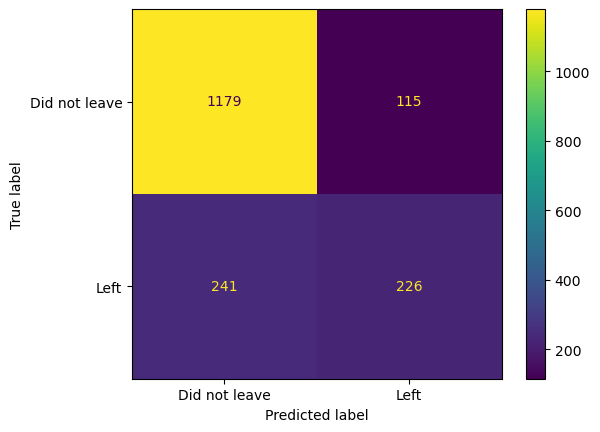

In [28]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,X_test,y_test,display_labels=["Did not leave","Left"])


In [ ]:
#Round 1
param_grid = {'max_depth':[3,4,5],
              'learning_rate':[0.1,0.5,1], 
              'gamma':[0,0.25,1.0], 
              'reg_lambda':[0,1.0,10.0], 
              'scale_pos_weight':[1,3,5], }

optimal_params = GridSearchCV(estimator =xgb.XGBClassifier(objective='binary:logistic',
                                                          seed=42,
                                                          subsample=0.9,
                                                          early_stopping_rounds=10,
                                                           eval_metric='auc',
                                                          colsample_bytree=0.5),
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs=10,
                             cv=3)

optimal_params.fit(X_train,
                  y_train,
                  eval_set=[(X_test,y_test)],
                  verbose=False)
print(optimal_params.best_params_)

In [29]:
#Round 2 
param_grid = {'max_depth':[4],
              'learning_rate':[0.1,0.5,1],
              'gamma':[0.25], 
              'reg_lambda':[10.0,20,100], 
              'scale_pos_weight':[3], }

optimal_params = GridSearchCV(estimator =xgb.XGBClassifier(objective='binary:logistic',
                                                          seed=42,
                                                          subsample=0.9,
                                                          early_stopping_rounds=10,
                                                          eval_metric='auc',
                                                          colsample_bytree=0.5),
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs=10,
                             cv=3)

optimal_params.fit(X_train,
                  y_train,
                  eval_set=[(X_test,y_test)],
                  verbose=False)
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 20, 'scale_pos_weight': 3}


In [30]:
clf_xgb = xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=0.25,
                           learning_rate=0.1,
                           max_depth=4,
                           reg_lambda=10,
                           scale_pos_weight=3,
                           subsample=0.9,
                           colsample_bytree=0.5,
                           eval_metric='aucpr',
                           early_stopping_rounds=10)
clf_xgb.fit(X_train,y_train,
           verbose=True,
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.54553
[1]	validation_0-aucpr:0.56880
[2]	validation_0-aucpr:0.62032
[3]	validation_0-aucpr:0.62974
[4]	validation_0-aucpr:0.63486
[5]	validation_0-aucpr:0.63784
[6]	validation_0-aucpr:0.63663
[7]	validation_0-aucpr:0.63713
[8]	validation_0-aucpr:0.63883
[9]	validation_0-aucpr:0.63841
[10]	validation_0-aucpr:0.63878
[11]	validation_0-aucpr:0.63934
[12]	validation_0-aucpr:0.65377
[13]	validation_0-aucpr:0.65006
[14]	validation_0-aucpr:0.65731
[15]	validation_0-aucpr:0.65439
[16]	validation_0-aucpr:0.65138
[17]	validation_0-aucpr:0.64968
[18]	validation_0-aucpr:0.65106
[19]	validation_0-aucpr:0.65699
[20]	validation_0-aucpr:0.65686
[21]	validation_0-aucpr:0.65957
[22]	validation_0-aucpr:0.65944
[23]	validation_0-aucpr:0.65426
[24]	validation_0-aucpr:0.65330
[25]	validation_0-aucpr:0.65394
[26]	validation_0-aucpr:0.65279
[27]	validation_0-aucpr:0.65241
[28]	validation_0-aucpr:0.65364
[29]	validation_0-aucpr:0.65406
[30]	validation_0-aucpr:0.65464


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

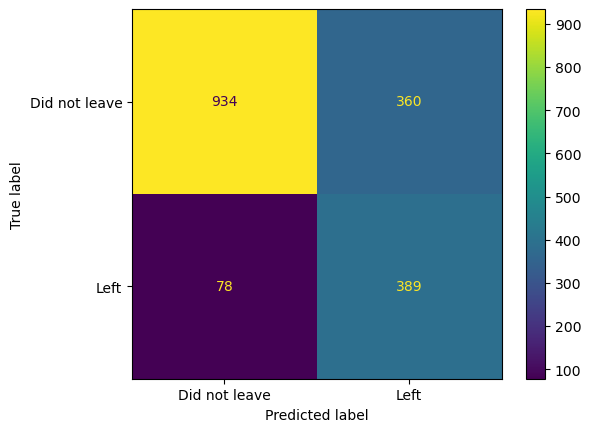

In [31]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,X_test,y_test,display_labels=["Did not leave","Left"])

weight:  {'Latitude': 1.0, 'Monthly_Charges': 4.0, 'City_Carlsbad': 1.0, 'Phone_Service_No': 1.0, 'Internet_Service_Fiber_optic': 1.0, 'Online_Backup_No': 1.0, 'Online_Security_No': 3.0, 'Contract_Month-to-month': 1.0, 'Contract_One_year': 1.0, 'Payment_Method_Electronic_check': 1.0}
gain:  {'Latitude': 18.067663192749023, 'Monthly_Charges': 39.80143737792969, 'City_Carlsbad': 5.2930908203125, 'Phone_Service_No': 8.530828475952148, 'Internet_Service_Fiber_optic': 272.9932861328125, 'Online_Backup_No': 14.234563827514648, 'Online_Security_No': 41.92280578613281, 'Contract_Month-to-month': 1645.472412109375, 'Contract_One_year': 40.556114196777344, 'Payment_Method_Electronic_check': 14.7442626953125}
cover:  {'Latitude': 98.58966064453125, 'Monthly_Charges': 254.83554077148438, 'City_Carlsbad': 329.7137756347656, 'Phone_Service_No': 210.90699768066406, 'Internet_Service_Fiber_optic': 1207.5361328125, 'Online_Backup_No': 105.32869720458984, 'Online_Security_No': 545.363037109375, 'Contrac

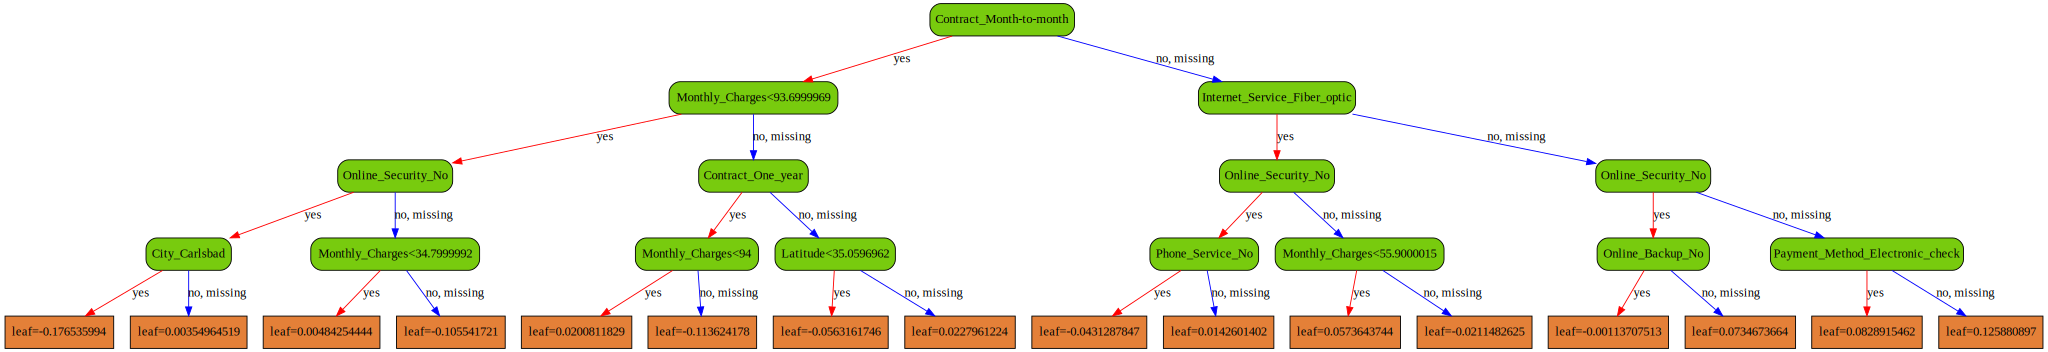

In [33]:
clf_xgb = xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=0.25,
                           learning_rate=0.1,
                           max_depth=4,
                           reg_lambda=10,
                           scale_pos_weight=3,
                           subsample=0.9,
                           colsample_bytree=0.5,
                           n_estimators=1)
clf_xgb.fit(X_train,y_train)
bst = clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s: '% importance_type,bst.get_score(importance_type=importance_type))
    
node_params = {'shape': 'box',
                  'style': 'filled,rounded',
                  'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box',
                  'style': 'filled',
                  'fillcolor': '#e48038'}
xgb.to_graphviz(clf_xgb ,num_trees=0,size="10,10",
                   condition_node_params=node_params,
                   leaf_node_params=leaf_params)